In [1]:
from Codigo import *
from statsmodels.tsa.vector_ar.vecm import VECM
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
Datos = Tachos('../Alemania_Reducida.csv')

In [41]:
Columnas(Datos, 'hogares')

Idoneidad de los programas de seguro social (% del bienestar total de los hogares beneficiarios)
Idoneidad de los programas de medidas de protección social (% del bienestar total de los hogares beneficiarios)
Idoneidad de los beneficios por desempleo y programas activos del mercado laboral (ALMP) (% del bienestar total de los hogares beneficiarios)
Gasto de consumo final de los hogares por crecimiento per cápita (% anual)
Gasto de consumo final de los hogares (US$ a precios constantes de 2010)
Gasto de consumo final de los hogares per cápita (US$ a precios constantes de 2010)
Gasto de consumo final de los hogares, PPA ( $ a precios internacionales constantes de 2011)
Gasto de consumo final de los hogares (UMN a precios constantes)
Gasto de consumo final de los hogares (UMN a precios actuales)
Idoneidad de los programas de trabajo y protección social (% del bienestar total de los hogares beneficiarios)
Hogares encabezados por mujeres (% de hogares con jefa de hogar)
Consumo de sal iodad

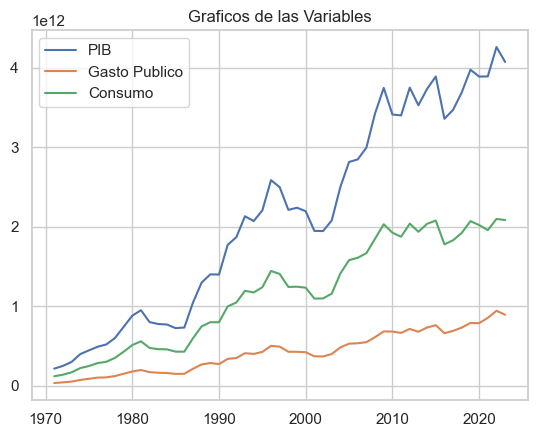

In [42]:
dt = Datos[['PIB (US$ a precios actuales)','Gasto de consumo final del gobierno general (US$ a precios actuales)','Gasto de consumo final de los hogares (US$ a precios actuales)']].dropna(axis = 0)
dt.columns = ['PIB', 'Gasto Publico','Consumo']
plt.title('Graficos de las Variables')
plt.plot(dt, label = dt.columns)
plt.legend()
plt.show()

In [43]:
print(dt.head())

                     PIB  Gasto Publico       Consumo
fecha                                                
1970-12-31  2.158384e+11   3.508178e+10  1.199358e+11
1971-12-31  2.499851e+11   4.337949e+10  1.394252e+11
1972-12-30  2.998015e+11   5.309152e+10  1.691002e+11
1973-12-31  3.983740e+11   7.327311e+10  2.228985e+11
1974-12-31  4.453035e+11   8.826537e+10  2.481818e+11


In [45]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import numpy as np

# Supongamos que 'data' es tu conjunto de datos en forma de matriz numpy
# Donde cada columna es una serie temporal diferente.

result = coint_johansen(dt, det_order=0, k_ar_diff=4)

# Imprimir resultados
print("Valores propios:")
print(result.eig)

print("\nVectores propios:")
print(result.evec)

print("\nEstadísticas de prueba:")
print(result.lr1)
print(result.lr2)

# Imprimir el número de vectores cointegrantes
print("\nNúmero de vectores cointegrantes:")
print(result.trace_stat_crit_vals)

print("\nOrder Eigenvalues:")
print(result.ind)

Valores propios:
[4.15790810e-01 2.46519354e-01 2.21128106e-04]

Vectores propios:
[[ 1.29748233e-11  4.94493305e-11 -1.06494633e-11]
 [ 5.88403420e-11 -8.95230627e-11  7.07740207e-11]
 [-4.20330232e-11 -6.04988941e-11 -6.23787829e-12]]

Estadísticas de prueba:
[3.93969243e+01 1.35971087e+01 1.06153228e-02]
[2.57998156e+01 1.35864934e+01 1.06153228e-02]

Número de vectores cointegrantes:
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Order Eigenvalues:
[0 1 2]


In [119]:
# Crear el modelo VECM
vecm = VECM(dt[['PIB','Consumo','Gasto Publico']], k_ar_diff= 4, coint_rank= 1)

# Calcular el resultado del modelo
results = vecm.fit()

# Imprimir los resultados
print(results.summary())

 Det. terms outside the coint. relation & lagged endog. parameters for equation PIB 
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.PIB               1.1781      1.606      0.734      0.463      -1.969       4.325
L1.Consumo          -1.4822      3.453     -0.429      0.668      -8.250       5.286
L1.Gasto Publico    -0.8449      2.932     -0.288      0.773      -6.592       4.902
L2.PIB              -1.9566      1.523     -1.285      0.199      -4.942       1.028
L2.Consumo           4.1639      3.159      1.318      0.187      -2.027      10.355
L2.Gasto Publico    -2.3109      2.842     -0.813      0.416      -7.880       3.258
L3.PIB               0.7348      1.458      0.504      0.614      -2.124       3.593
L3.Consumo           0.7531      3.926      0.192      0.848      -6.941       8.447
L3.Gasto Publico    -4.5142      4.926     -0.916      0.359     

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


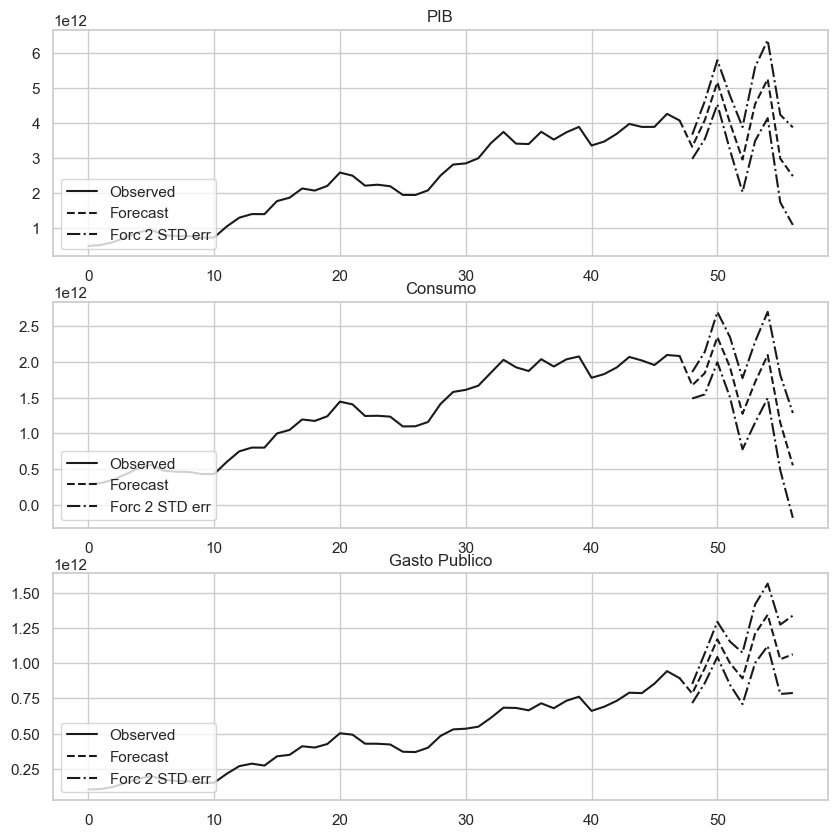

In [109]:
results.plot_forecast(steps = 9)